# FederatedPi
This is a project where we aim to apply a federated learning technique to a Multi-Layer Perceptron (MLP) model.

# Data Generation
    

In [1]:
#This file will generate data for training
#Temperature values range from 20C to 43C (highest recorded fever) in humans, 36.5 to 37.5 being the o.k. range
#Resting heart rate values range in humans range from 60 (low for an old person) and 190 (high for a newborn)

    #newborn : 140 ± 50
    #1–2 ans : 110 ± 40
    #3–5 ans : 105 ± 35
    #6–12 ans : 95 ± 30
    #adolescent ou adulte : 70 ± 10
    #personne âgée : 65 ± 5

#We will generate values based on the age of subjects and a gaussian normal distribution
#from faker import Faker
#from faker.providers import BaseProvider
import random
import csv
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def get_age():
    #return  random.randrange(0, 100)
    return random.uniform(0,100)
def get_Temp():
    mu= 37
    sigma= 0.5

    return round(random.gauss(mu,sigma), 1)

def get_HR(age):

    if age<1:
        mu= 140
        sigma= 50
    elif age<3:
        mu= 110
        sigma= 40
    elif age<5:
        mu= 105
        sigma= 35
    elif age<12:
        mu= 95
        sigma= 30
    elif age<65:
        mu= 70
        sigma= 10
    else:
        mu= 65
        sigma= 5

    return round(random.gauss(mu,sigma), 1)

# def get_Label(age, temp, hr):
#     label=0
#     if ( 0<=age<1 and 90<=hr<=190 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 1<=age<3 and 70<=hr<=150 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 3<=age<6 and 70<=hr<=140 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 0<=age<12 and 65<=hr<=125 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( 12<=age<65 and 60<=hr<=90 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     if ( age>=65 and 60<=hr<=70 and 36.5<temp<37.5 ):
#         label=1
#         return label

#     return label
def get_Label(age, temp, hr): # increases with age & hr & temp
#   label = round((hr/190)*(age/100)*90)
    if (age/100)>0.5 and (hr/190)<0.5 and temp>36.5 and temp<37.5:
        label=1
        return label
    label=0
    return label


def generate_DATA():
    a=get_age();
    b=get_Temp();
    c=get_HR(a);
    d=get_Label(a,b,c);
    return [a,b,c,d]
    #return [a,b,c,d]
    
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

with open('Data_Train.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 200):
        writer.writerow(generate_DATA())

with open('Data_Test.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 100):
        writer.writerow(generate_DATA())
        
#Data_Train = min_max_scaling(pd.read_csv('Data_Train.csv',dtype=np.float64))
#Data_Test = min_max_scaling(pd.read_csv('Data_Test.csv',dtype=np.float64))
Data_Train = pd.read_csv('Data_Train.csv')
Data_Test = pd.read_csv('Data_Test.csv')

print(Data_Train) #original Data
print(Data_Test) #original Data

Data_Train1 = Data_Train.iloc[:99,:]
Data_Test1 = Data_Test.iloc[:49,:]

print(Data_Train1.shape)
print(Data_Test1.shape)


Data_Train2 = Data_Train.iloc[100:,:]
Data_Test2 = Data_Test.iloc[50:,:]

print(Data_Train2.shape)
print(Data_Test2.shape)


           Age  Temperature  HeartBPM  Label
0    92.589708         37.0      64.9      1
1    25.802410         37.0      74.1      0
2    56.365845         37.5      80.7      0
3    87.885938         37.6      73.2      0
4    97.737031         35.6      62.2      0
..         ...          ...       ...    ...
194  82.186804         37.4      68.5      1
195  47.924685         37.6      65.5      0
196  34.317418         37.8      68.8      0
197  39.160731         36.9      65.8      0
198   8.828378         37.6     113.7      0

[199 rows x 4 columns]
          Age  Temperature  HeartBPM  Label
0   38.911173         37.2      59.4      0
1   53.889921         37.3      64.1      1
2   17.352842         36.5      38.2      0
3   85.397627         36.6      74.5      1
4   58.021642         36.7      66.0      1
..        ...          ...       ...    ...
94  80.569967         36.8      63.9      1
95  34.675036         36.7      49.3      0
96  22.588143         37.0      58.3    

##Data Visualisation

In [2]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Temperature'>

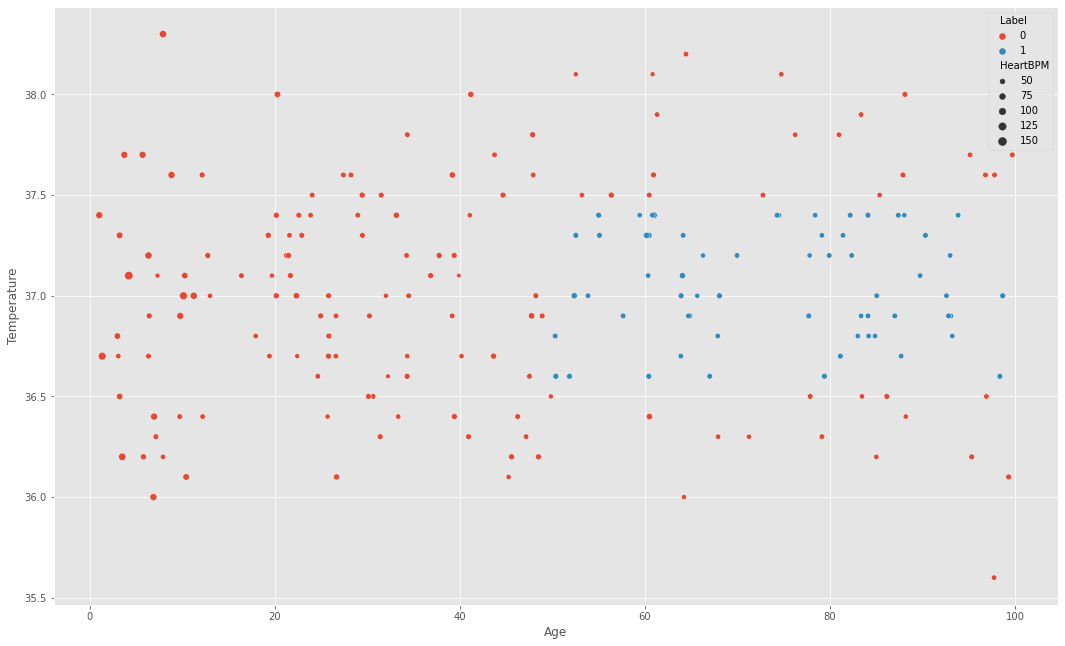

In [3]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,11)
sns.scatterplot(y = Data_Train.Temperature, x=Data_Train.Age,
               size = Data_Train.HeartBPM, hue= Data_Train.Label,
               )

<AxesSubplot:xlabel='Age', ylabel='HeartBPM'>

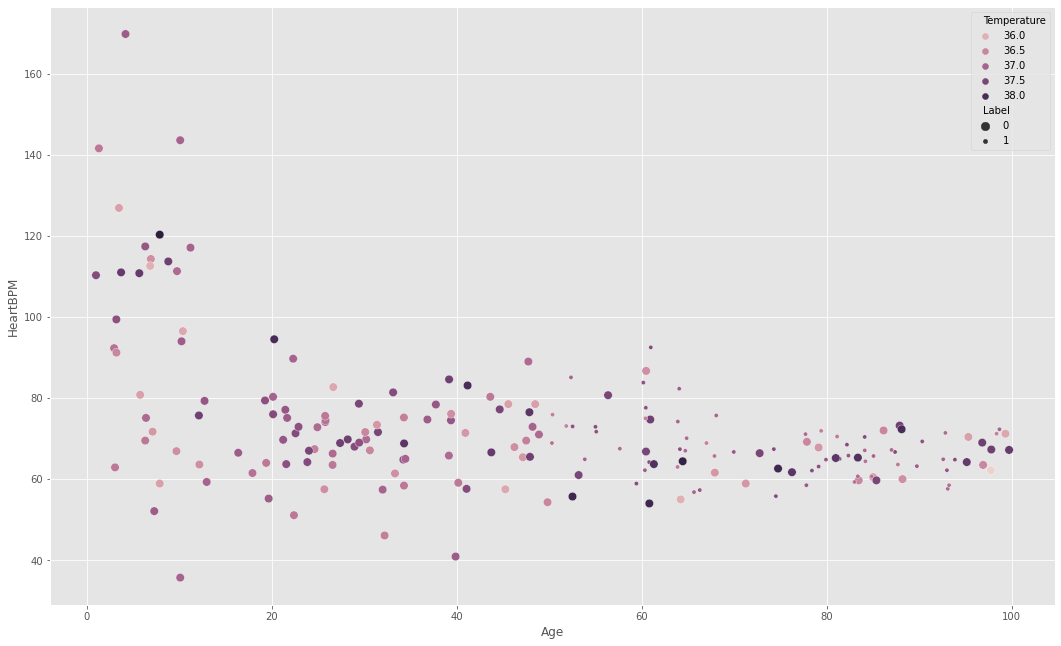

In [4]:
#Data_Train.plot(kind='scatter',x='Temperature',y='Age', color ='red', size = 'HeartBPM')
sns.scatterplot(x = Data_Train.Age, y=Data_Train.HeartBPM,
               size = Data_Train.Label, hue = Data_Train.Temperature)

In [5]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          199 non-null    float64
 1   Temperature  199 non-null    float64
 2   HeartBPM     199 non-null    float64
 3   Label        199 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.3 KB


In [6]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          99 non-null     float64
 1   Temperature  99 non-null     float64
 2   HeartBPM     99 non-null     float64
 3   Label        99 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [7]:
Data_Train.head(10)

Age  Temperature  HeartBPM  Label
0  92.589708         37.0      64.9      1
1  25.802410         37.0      74.1      0
2  56.365845         37.5      80.7      0
3  87.885938         37.6      73.2      0
4  97.737031         35.6      62.2      0
5  85.008633         36.2      60.5      0
6  60.988007         37.4      92.5      1
7  31.496162         37.5      71.6      0
8  60.807651         37.4      64.2      1
9  47.155223         36.3      65.4      0

In [8]:
Data_Test.head(10)

Age  Temperature  HeartBPM  Label
0  38.911173         37.2      59.4      0
1  53.889921         37.3      64.1      1
2  17.352842         36.5      38.2      0
3  85.397627         36.6      74.5      1
4  58.021642         36.7      66.0      1
5  73.394738         36.7      64.0      1
6  95.494689         37.1      66.4      1
7  56.941089         37.6      67.7      0
8  20.641290         37.5      69.7      0
9  19.125957         37.3      56.0      0

In [9]:
# train_dataset = np.loadtxt(open("Data.csv", "rb"), delimiter=",", skiprows=1)

In [10]:
Data_Train.describe()

Age  Temperature    HeartBPM       Label
count  199.000000   199.000000  199.000000  199.000000
mean    49.021467    37.023618   72.583417    0.306533
std     29.188373     0.505620   17.301520    0.462216
min      1.014765    35.600000   35.700000    0.000000
25%     24.339230    36.700000   63.550000    0.000000
50%     47.924685    37.000000   68.900000    0.000000
75%     76.975613    37.400000   75.650000    1.000000
max     99.710636    38.300000  169.800000    1.000000

In [11]:
Data_Test.describe()

Age  Temperature    HeartBPM      Label
count  99.000000    99.000000   99.000000  99.000000
mean   50.806132    36.995960   70.130303   0.313131
std    30.055456     0.528556   15.633797   0.466127
min     1.056596    35.600000   17.300000   0.000000
25%    23.085830    36.600000   63.850000   0.000000
50%    51.842509    37.000000   67.900000   0.000000
75%    79.626626    37.300000   74.900000   1.000000
max    98.468816    38.400000  141.200000   1.000000

In [12]:
sum(Data_Test.duplicated())
sum(Data_Train.duplicated())

0

## This dataset contains no : missing data, qualitative values, normalized values


# Data Pre-Processing

In [13]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0

# percentage of training set to use as validation
valid_size = 0.2


In [14]:

# obtain training indices that will be used for validation
num_train = len(Data_Train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


In [15]:
Data_Train

Age  Temperature  HeartBPM  Label
0    92.589708         37.0      64.9      1
1    25.802410         37.0      74.1      0
2    56.365845         37.5      80.7      0
3    87.885938         37.6      73.2      0
4    97.737031         35.6      62.2      0
..         ...          ...       ...    ...
194  82.186804         37.4      68.5      1
195  47.924685         37.6      65.5      0
196  34.317418         37.8      68.8      0
197  39.160731         36.9      65.8      0
198   8.828378         37.6     113.7      0

[199 rows x 4 columns]

In [16]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

targets_df = pd.DataFrame(data=Data_Train["Label"])
targets_df.columns = ["Label"]


del Data_Train["Label"]

train = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Train)), torch.tensor(targets_df['Label'].values))

train_loader = torch.utils.data.DataLoader(train,sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train,sampler=valid_sampler, num_workers=num_workers)

test_targets_df = pd.DataFrame(data=Data_Test["Label"])
test_targets_df.columns = ["Label"]

del Data_Test["Label"]

test = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Test)), torch.tensor(test_targets_df['Label'].values))

test_loader = torch.utils.data.DataLoader(test,num_workers=num_workers)

In [17]:
train_loader

In [18]:
test_loader

# Building Classic Model

In [19]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch import nn
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        #self.drop1 = nn.Dropout(p=0.8)
        self.input = nn.Linear(3, 5)
        #self.drop2 = nn.Dropout(p=0.5)
        self.hidden1 = nn.Linear(5, 5)
        self.hidden2 = nn.Linear(5, 4)
#         self.hidden3 = nn.Linear(5, 5)
#         self.hidden4 = nn.Linear(5, 5)
        self.hidden5 = nn.Linear(4, 2)
        
        self.output = nn.Linear(2, 2)
        # Define sigmoid activation and softmax output
        self.ReLU = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        #x = self.drop1(x)
        x = self.input(x)
        #x = self.drop2(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
#         x = self.hidden3(x)
#         x = self.hidden4(x)
        x = self.hidden5(x)

        x = self.ReLU(x)
        x = self.output(x)
        
        x = self.softmax(x)

        return x

model = Network()


In [20]:
model1 = model
model2 = model
modelFed = model

models = [model1,model2]

# Training Model

Loss function is categorical cross-entropy
Optimisation is done by ADAM

In [21]:
# specify loss function (categorical cross-entropy for classification, L1 loss for mean absolute error)

criterion = nn.CrossEntropyLoss()
#criterion = nn.L1Loss()
#criterion = nn.NLLLoss()
#c


# specify optimizer (stochastic gradient descent)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# optimizer = torch.optim.NAdam(model.parameters(), lr=0.2, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, momentum_decay=0.004)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)


In [22]:
import matplotlib.pyplot as plt

val_losses = []
train_losses = []

## https://www.kaggle.com/shubhendumishra/titanic-mlp-model-using-pytorch#Data-Exploration

In [23]:
#output = model(something)
#print(output[0]) prints specific output from model

In [24]:
#print(target[0]) prints labels

In [25]:
# number of epochs to train the model
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])#.type(torch.FloatTensor)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #################
    # Training Loss #
    #################
    #train_losses.append(loss.item())
    train_losses.append(train_loss/len(train_loader.sampler))
        
    ######################    
    # Validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        #torch.load('model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.637532 	Validation Loss: 0.584497
Validation loss decreased (inf --> 0.584497).  Saving model ...
Epoch: 2 	Training Loss: 0.558245 	Validation Loss: 0.599780
Epoch: 3 	Training Loss: 0.522238 	Validation Loss: 0.541101
Validation loss decreased (0.584497 --> 0.541101).  Saving model ...
Epoch: 4 	Training Loss: 0.519927 	Validation Loss: 0.551282
Epoch: 5 	Training Loss: 0.510237 	Validation Loss: 0.570699
Epoch: 6 	Training Loss: 0.497176 	Validation Loss: 0.545362
Epoch: 7 	Training Loss: 0.518746 	Validation Loss: 0.545170
Epoch: 8 	Training Loss: 0.514337 	Validation Loss: 0.569165
Epoch: 9 	Training Loss: 0.634605 	Validation Loss: 0.595295
Epoch: 10 	Training Loss: 0.625786 	Validation Loss: 0.595298
Epoch: 11 	Training Loss: 0.625779 	Validation Loss: 0.595302
Epoch: 12 	Training Loss: 0.625775 	Validation Loss: 0.595304
Epoch: 13 	Training Loss: 0.625772 	Validation Loss: 0.595304
Epoch: 14 	Training Loss: 0.625771 	Validation Loss: 0.595305
Epoch: 1

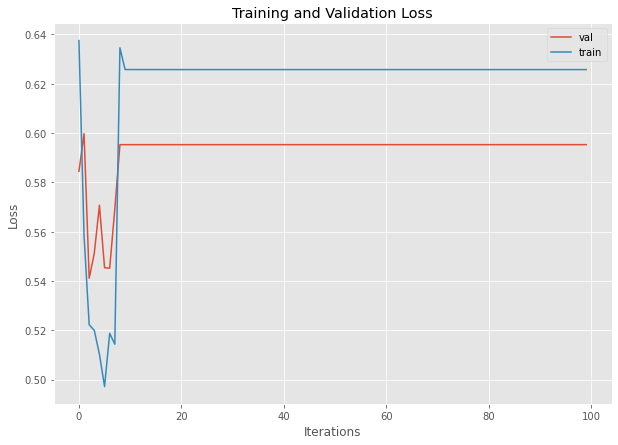

In [26]:
plt.figure(figsize=(10,7))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [28]:
Data_Test.head()

Age  Temperature  HeartBPM
0  38.911173         37.2      59.4
1  53.889921         37.3      64.1
2  17.352842         36.5      38.2
3  85.397627         36.6      74.5
4  58.021642         36.7      66.0

In [29]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation
results=[]
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data[:,:3])
    print(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    results.append([int(data[:,0].item()), pred.item()])
    # compare predictions to true label
    correct = pred.eq(target.view_as(pred))
  
    # calculate test accuracy for each object class
    #break
    #print('Output %s Target %s Predicted %s Correct %s' % (output,target.item(),pred.item(),correct.item()))
    for i in range(len(target)):
        label = target.data
        class_correct[label] += correct.item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

tensor([[38.9112, 37.2000, 59.4000]])
tensor([[53.8899, 37.3000, 64.1000]])
tensor([[17.3528, 36.5000, 38.2000]])
tensor([[85.3976, 36.6000, 74.5000]])
tensor([[58.0216, 36.7000, 66.0000]])
tensor([[73.3947, 36.7000, 64.0000]])
tensor([[95.4947, 37.1000, 66.4000]])
tensor([[56.9411, 37.6000, 67.7000]])
tensor([[20.6413, 37.5000, 69.7000]])
tensor([[19.1260, 37.3000, 56.0000]])
tensor([[23.2362, 37.6000, 83.7000]])
tensor([[92.0679, 37.0000, 61.6000]])
tensor([[90.6545, 36.8000, 71.9000]])
tensor([[  3.3991,  37.4000, 141.2000]])
tensor([[87.8960, 37.3000, 69.6000]])
tensor([[11.0076, 36.5000, 25.8000]])
tensor([[70.0070, 36.5000, 67.0000]])
tensor([[ 8.6569, 37.7000, 82.8000]])
tensor([[16.0633, 36.0000, 84.6000]])
tensor([[90.9298, 36.6000, 59.2000]])
tensor([[94.3190, 37.8000, 61.5000]])
tensor([[13.8965, 36.8000, 78.8000]])
tensor([[64.7471, 37.3000, 70.6000]])
tensor([[98.4688, 36.8000, 70.9000]])
tensor([[71.1694, 37.2000, 65.7000]])
tensor([[95.1662, 37.5000, 56.9000]])
tensor([[

## Federated Learning 

In [68]:

#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Python version: 3.6

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset


class DatasetSplit(Dataset):
    """An abstract Dataset class wrapped around Pytorch Dataset class.
    """

    def __init__(self, dataset, idxs):
        self.dataset = dataset
        self.idxs = [int(i) for i in idxs]

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, item):
        image, label = self.dataset[self.idxs[item]]
        return torch.tensor(image), torch.tensor(label)

class LocalUpdate(object):
    def __init__(self, dataset, idxs):
        self.trainloader, self.validloader, self.testloader = self.train_val_test(
            dataset, list(idxs))
        self.device = 'cpu'
        #if args.gpu else 'cuda'
        # Default criterion set to NLL loss function
        self.criterion = nn.NLLLoss().to(self.device)

    def train_val_test(self, dataset, idxs):
        """
        Returns train, validation and test dataloaders for a given dataset
        and user indexes.
        """
        # split indexes for train, validation, and test (80, 10, 10)
        idxs_train = idxs[:int(0.8*len(idxs))]
        idxs_val = idxs[int(0.8*len(idxs)):int(0.9*len(idxs))]
        idxs_test = idxs[int(0.9*len(idxs)):]

        trainloader = DataLoader(DatasetSplit(dataset, idxs_train),
                                 batch_size= 99, shuffle=True)
        validloader = DataLoader(DatasetSplit(dataset, idxs_val),
                                 batch_size= 99, shuffle=False)
        testloader = DataLoader(DatasetSplit(dataset, idxs_test),
                                batch_size= 99, shuffle=False)
        return trainloader, validloader, testloader

    def update_weights(self, model, global_round):
        # Set mode to train model
        model.train()
        epoch_loss = []

        # Set optimizer for the local updates
        num_train = len(Data_Train)
        indices = list(range(num_train))
        np.random.shuffle(indices)
        split = int(np.floor(valid_size * num_train))
        train_idx, valid_idx = indices[split:], indices[:split]
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)
        trainloader = torch.utils.data.DataLoader(train,sampler=train_sampler, num_workers=num_workers)
        #trainloader = DataLoader(DatasetSplit(train, train_idx),
                               #  batch_size=99, shuffle=True)
        for iter in range(100):
            batch_loss = []
            for (data, target) in trainloader:
                data, target = data.to(self.device), target.to(self.device)

                optimizer.zero_grad()
                log_probs = model(data)
                loss = self.criterion(log_probs, target)
                loss.backward()
                optimizer.step()

                #if self.args.verbose and (batch_idx % 10 == 0):
                batch_idx = 99
                print('| Global Round : {} | Local Epoch : {} | [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                        global_round, iter, batch_idx * len(data),
                        len(self.trainloader.dataset),
                        100. * batch_idx / len(self.trainloader), loss.item()))
                
                batch_loss.append(loss.item())
            epoch_loss.append(sum(batch_loss)/len(batch_loss))

        return model.state_dict(), sum(epoch_loss) / len(epoch_loss)






In [ ]:
import copy
# number of epochs to train the model
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # Train the model #
    ###################
    modelFed.train() # prep model for training
    local_weights, local_losses = [], []
    idxs_users = np.random.choice(range(2), 1, replace=False)

    for idx in idxs_users:
        local_model = LocalUpdate(dataset=Data_Train, idxs = [1,2] )#, 
        #idxs=user_groups[idx])
        
        #############
        w, loss = local_model.update_weights(
                
                
        model=copy.deepcopy(modelFed), global_round=epoch)
        local_weights.append(copy.deepcopy(w))
        local_losses.append(copy.deepcopy(loss))
            
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])#.type(torch.FloatTensor)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #################
    # Training Loss #
    #################
    #train_losses.append(loss.item())
    train_losses.append(train_loss/len(train_loader.sampler))
        
    ######################    
    # Validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
   
    
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        #torch.load('model.pt')
        valid_loss_min = valid_loss

| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.974333
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.833898
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999980
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999964
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.983722
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.984570
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.986483
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999992
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.013496
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.513618
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.817176
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.001390
| Global Round : 0 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.997891
| Global Round : 0 |

| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.002504
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.318129
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.005930
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000083
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.963735
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 |

| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 |

| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 |

| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 |

| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 |

| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 |

| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 0 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 0 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Glob

Epoch: 1 	Training Loss: 0.503772 	Validation Loss: 0.559377
Validation loss decreased (inf --> 0.559377).  Saving model ...
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.997937
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.998507
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.004606
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999985
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.000036
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999987
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999998
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.047120
| Global Round : 1 | Local Epoch : 

| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999992
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999998
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.907293
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.141881
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.309731
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.902548
| Global Round : 1 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999989
| Global Round : 1 |

| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999721
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000002
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.836816
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999994
| Global Round : 1 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.207051
| Global Round : 1 |

| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.506411
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.999993
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.621591
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.995219
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.082500
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000466
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.604343
| Global Round : 1 |

| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.998443
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000049
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.995579
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000067
| Global Round : 1 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 |

| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.335684
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.982094
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 |

| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.999998
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 |

| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.999981
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.999910
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.999713
| Global Round : 1 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.999981
| Glob

| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.955905
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.272063
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.273987
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.440595
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.001442
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.999780
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.001112
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.996047
| Glob

| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.867473
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.999544
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.999999
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.849188
| Glob

| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.999982
| Global Round : 1 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.001539
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.999974
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000040
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.995737
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.998326
| Globa

| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Globa

| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Ro

| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Ro

| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 32 | [99/1 (9900%)]	Loss: 0.000000
| Global Roun

| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Roun

| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 37 | [99/1 (9900%)]	Loss: 0.000000
| Global R

| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 40 | [99/1 (9900%)]	Loss: 0.000000
| Global R

| Global Round : 1 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 41 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 41 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 48 | [99/1 (9900%)]	Loss: 0.000000
| Global R

| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Rou

| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Ro

| Global Round : 1 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 52 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 52 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Ro

| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Ro

| Global Round : 1 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round

| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 68 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 72 | [99/1 (9900%)]	Loss: 0.000000
| Global

| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Global

| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 76 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Ro

| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global R

| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Ro

| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Roun

| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 94 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 1 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global R

Epoch: 2 	Training Loss: 0.535420 	Validation Loss: 0.559077
Validation loss decreased (0.559377 --> 0.559077).  Saving model ...
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.932837
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.238710
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999826
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.705137
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.000265
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.230420
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999875
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999994
| Global Round : 2 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999809
| Global Round : 2 | Local Epo

| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.994468
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999998
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.974170
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000195
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 |

| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999557
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 |

| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.999996
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.899193
| Global Round : 2 |

| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 |

| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.609545
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.999995
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000002
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.999995
| Global Round : 2 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 |

| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.007929
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.004547
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.992081
| Global Round : 2 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 |

| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -0.999931
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 10 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Ro

| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 15 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 18 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 26 | [99/1 (9900%)]	Loss: 0.000000
| Global Ro

| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 29 | [99/1 (9900%)]	Loss: 0.000000
| Global Rou

| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Roun

| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Roun

| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 41 | [99/1 (9900%)]	Loss: 0.000000
| Global

| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Roun

| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 44 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global 

| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global R

| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 62 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global R

| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 69 | [99/1 (9900%)]	Loss: 0.000000
| Global Ro

| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 71 | [99/1 (9900%)]	Loss: 0.000000
| Global Ro

| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Ro

| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 77 | [99/1 (9900%)]	Loss: -0.000000
| Global Rou

| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Ro

| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 87 | [99/1 (9900%)]	Loss: 0.000000
| Global R

| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Ro

| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 2 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 93 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global R

| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 2 | Local Epoch : 99 | [99/1 (9900%)]	Loss: -1.000000
| Globa

Epoch: 3 	Training Loss: 0.524356 	Validation Loss: 0.547467
Validation loss decreased (0.559077 --> 0.547467).  Saving model ...
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999989
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.000052
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.801117
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999445
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.988867
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.003245
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.010496
| Global Round : 3 | Local Epo

| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 |

| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 |

| Global Round : 3 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 5 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 |

| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 |

| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 |

| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 |

| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 21 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 24 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 29 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 32 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 61 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 66 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 69 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 88 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 91 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 3 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Glob

Epoch: 4 	Training Loss: 0.497114 	Validation Loss: 0.545273
Validation loss decreased (0.547467 --> 0.545273).  Saving model ...
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999430
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999996
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.000031
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999827
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999769
| Global Round : 4 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epo

| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999638
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.993020
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.998472
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999997
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.567446
| Global Round : 4 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 |

| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999997
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.010521
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000420
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999918
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999977
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.689631
| Global Round : 4 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 |

| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.401829
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.480012
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.033316
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000087
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 |

| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.381822
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.422715
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.576136
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.998224
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.998989
| Global Round : 4 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 |

| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.205920
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.999999
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.934568
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.994991
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -0.996363
| Global Round : 4 | Local Epoch : 7 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 |

| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.017874
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000077
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.999709
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 |

| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.416359
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.999998
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.003076
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000031
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000804
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.999991
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.999177
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.999999
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.997554
| Glob

| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 15 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.999920
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.972048
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.842625
| Global Round : 4 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000004
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000001
| Glob

| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.998682
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000003
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 27 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 30 | [99/1 (9900%)]	Loss: 0.000000
| Global

| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Global 

| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 35 | [99/1 (9900%)]	Loss: -0.000000
| Global

| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000002
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 43 | [99/1 (9900%)]	Loss: 0.000000
| Globa

| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.999482
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 46 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000002
| Global Round : 4 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000002
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global R

| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 52 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 55 | [99/1 (9900%)]	Loss: 0.000000
| Global 

| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.999645
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 58 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 59 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.999764
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 4 | Local Epoch : 63 | [99/1 (9900%)]	Loss: -0.000000
| Global R

| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Globa

| Global Round : 4 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 71 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 72 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 75 | [99/1 (9900%)]	Loss: 0.000000
| Globa

| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 80 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global

| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 83 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 85 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 85 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global 

| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global

| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: 0.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 96 | [99/1 (9900%)]	Loss: -1.000000
| Globa

| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 4 | Local Epoch : 98 | [99/1 (9900%)]	Loss: -1.000000
| Glob

Epoch: 5 	Training Loss: 0.501710 	Validation Loss: 0.561746
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999805
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.002261
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.198082
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999995
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.999999
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 0 | [99/1 (9900%)]	Loss: -0.995454
| Global Round : 5 | Local Ep

| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.001456
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999968
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.999750
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.056001
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -0.987500
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 1 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 |

| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.991504
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999395
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000001
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.000264
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.999509
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -0.995360
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 3 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 |

| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 4 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 |

| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 6 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 |

| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 8 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 |

| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 9 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 |

| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 11 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 12 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 14 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 16 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 17 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 19 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 20 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 22 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 23 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 25 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 26 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 28 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 30 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 31 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 33 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 34 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 36 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 37 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 38 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 39 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 41 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 42 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 44 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 45 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 47 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 48 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 49 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 50 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 51 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 53 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 54 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 56 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 57 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 59 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 60 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 62 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 64 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 65 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 67 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 68 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 70 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 71 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 73 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 74 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 76 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 78 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 79 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 81 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 82 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 84 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 86 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 87 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 89 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 90 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 92 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 93 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 94 | [99/1 (9900%)]	Loss: -0.000000
| Glob

| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 95 | [99/1 (9900%)]	Loss: -1.000000
| Glob

| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -0.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Global Round : 5 | Local Epoch : 97 | [99/1 (9900%)]	Loss: -1.000000
| Glob